# <i><font color=black> Principal Component Analysis with NumPy </color>

* Welcome to this project on Principal Component Analysis with NumPy and Python.
* In this project, you will do all the machine learning without using any of the popular machine learning libraries such as scikit-learn and statsmodels. The aim of this project and is to implement all the machinery of the various learning algorithms yourself, so you have a deeper understanding of the fundamentals. 
* By the time you complete this project, you will be able to implement and apply PCA from scratch using NumPy in Python, conduct basic exploratory data analysis, and create simple data visualizations with Seaborn and Matplotlib. 
* The prerequisites for this project are prior programming experience in Python and a basic understanding of machine learning theory.</font> 

## Load the data and the libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(12,8)

In [3]:
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns=["sepal_length","sepal_width","petal_legth","petal_width","species"]
iris.dropna(how='all',inplace=True)
iris.head()

,sepal_length,sepal_width,petal_legth,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_legth     150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Visualize the data

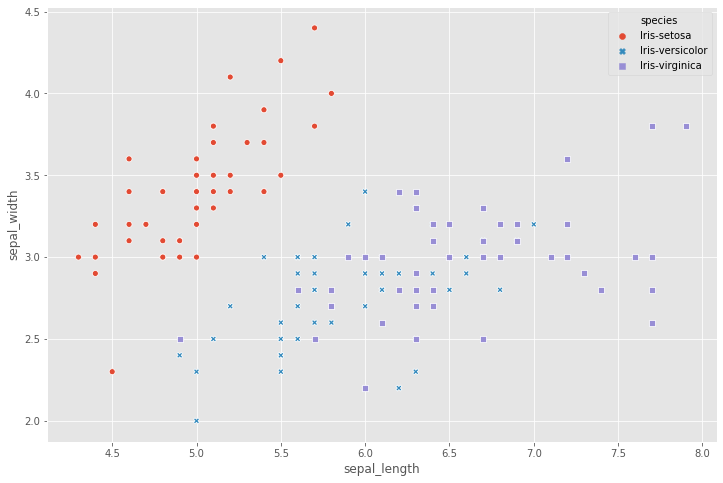

In [6]:
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species,style=iris.species)

## Standardize the data 

In [7]:
x=iris.iloc[:,0:4].values
y=iris.species.values

In [8]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(x)

## Compute the eigenvectors and eigenvalues

In [11]:
covariance_matrix=np.cov(X.T)
print("Covariance matrix \n",covariance_matrix)

Covariance matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [12]:
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
print("Eigenvectors \n",eigen_vectors,"\n")
print("Eigenvalues \n",eigen_values)

Eigenvectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601]


## Singular value decomposition(SVD)

In [13]:
eigen_vec_svd,s,v=np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

## Selecting principal components using explained variance

In [14]:
for val in eigen_values:
    print(val)

2.930353775589316
0.9274036215173427
0.14834222648163983
0.020746013995595787


In [15]:
variance_explained=[(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380131, 23.030523267680664, 3.683831957627387, 0.5151926808906284]

In [16]:
cumulative_variance_explained=np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

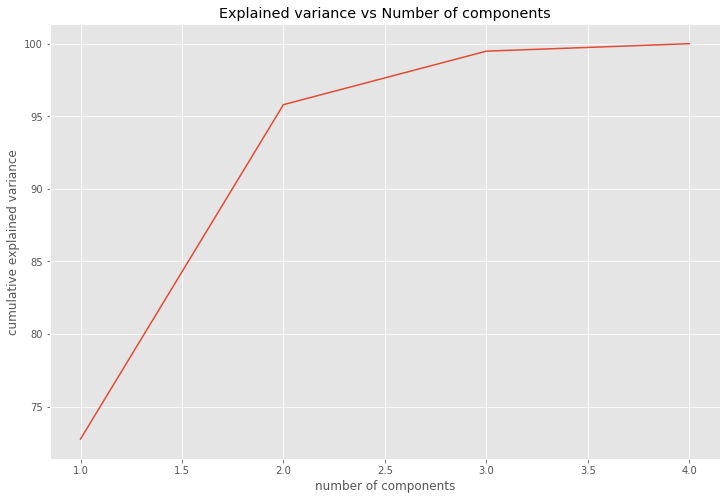

In [21]:
sns.lineplot(x=[1,2,3,4],y=cumulative_variance_explained);
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

## Project data onto lower-dimensional linear subspace

In [24]:
projection_matrix=(eigen_vectors.T[:][:])[:2].T
print("projection matrix \n",projection_matrix)

projection matrix 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [25]:
x_pca=x.dot(projection_matrix)

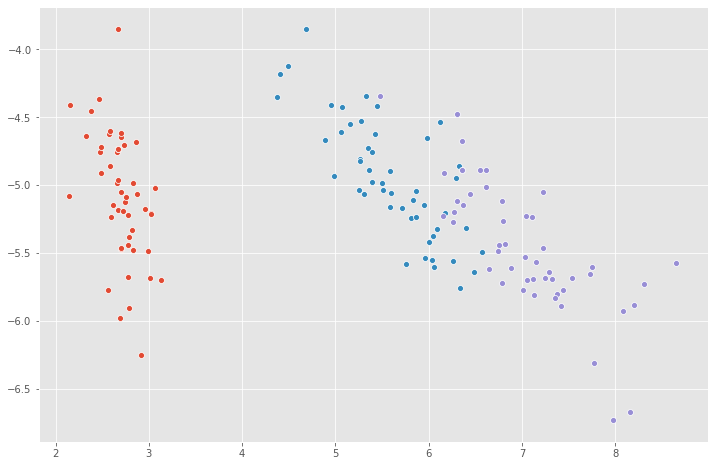

In [27]:
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
    sns.scatterplot(x_pca[y==species,0],x_pca[y==species,1])